In [48]:
#Importação de módulos
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [49]:
#Leitura da base de dados
base = pd.read_csv('plano_saude.csv')
X = base.iloc[:, 0:1].values
y = base.iloc[:, 1:2].values

In [50]:
base.head()

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488


In [51]:
#Variavel previsora (idade)
X[0]

array([18])

In [52]:
#Variável alvo (custo)
y[0]

array([871])

In [53]:
#Escalonamento de variáveis
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [54]:
#Divisão de base de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, 
                                                                  y.ravel(),
                                                                  test_size = 0.3,                                                                
                                                                  random_state = 0
                                                                 )

In [55]:
#Montagem da rede e treinamento
regressor = MLPRegressor(
                        hidden_layer_sizes = (9,9),
                        max_iter = 1000
                        )
regressor.fit(X_treinamento, y_treinamento)

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

In [56]:
#Análise do score do treinamento
regressor.score(X_treinamento, y_treinamento)


0.9687164985722687

In [57]:
#Análise do score da base de teste
regressor.score(X_teste, y_teste)

0.9446139913094014

In [58]:
#Calculando o Erro Absoluto Médio
previsoes = regressor.predict(X_teste)
y_teste = scaler_y.inverse_transform(y_teste)
previsoes = scaler_y.inverse_transform(previsoes)
mae = mean_absolute_error(y_teste, previsoes)
mae

183.0194043093944

In [59]:
#Previsão de um ponto da regressão
novo = [[40]]
novo = scaler_x.transform(novo)  #Escalonamento
scaler_y.inverse_transform(regressor.predict(novo))  #Escalonamento inverso

array([1480.82213451])

Text(0, 0.5, 'Custo')

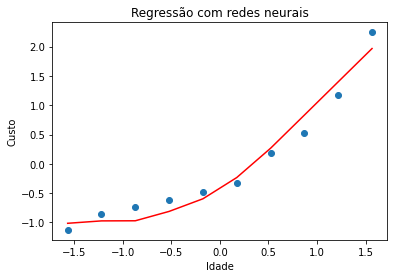

In [60]:
#Plotando o gráfico
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')
plt.title('Regressão com redes neurais')
plt.xlabel('Idade')
plt.ylabel('Custo')